
分析自己的交易记录

时间段 20150331 到 20171220  共356次交易

无关策略，策略中间有小的变化


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")# darkgrid , whitegrid , dark , white ,和 ticks 

plt.rcParams['font.sans-serif'] = ['SimHei'] # 画图显示中文

df = pd.read_csv('trade_record.csv', encoding='gbk')
df = df.sort_values(by='开仓日期').reset_index().drop(['Unnamed: 0', 'index'],axis=1)

df['盈亏'] = df['逐笔平仓盈亏'].apply(lambda y:1 if y>0 else -1) # 盈利 1  亏损 -1 （平仓大于0盈利，反之亏损）
总盈亏 = df['逐笔平仓盈亏'].sum()
yk = df['盈亏'].value_counts()
盈利比例 = yk[1]/(yk[1]+yk[-1]) * 100
盈利比例 = round(盈利比例, 1)
print('盈利比例  {}%'.format(盈利比例))
print('总盈亏  {}元'.format(总盈亏))  # 没包含手续费

盈利比例  31.5%
总盈亏  -40190元


#### 看每个品种单独的交易次数和盈亏

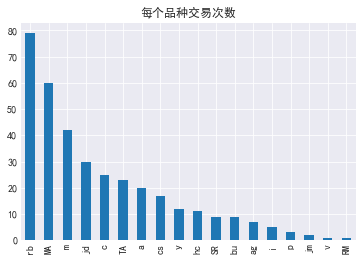

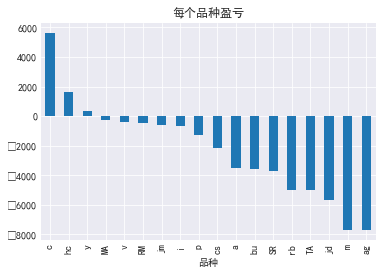

In [25]:
def heyue_name(heyue):
    '''提取品种名'''
    rtn = ''
    for c in heyue:
        if c.isalpha():
            rtn += c
        else:
            break
    #print(rtn)
    return rtn

df['品种'] = df['合约'].apply(heyue_name)
pzcnt = df['品种'].value_counts()
#print('每个品种的交易次数')
#print(pzcnt) # 每个品种的交易次数
pzcnt.plot(kind='bar')
plt.title('每个品种交易次数')
plt.show()

pzyk = df.groupby('品种')['逐笔平仓盈亏'].sum()
pzyk = pzyk.sort_values(ascending=False)
#print('每个品种盈亏')
#print(pzyk) # 每个品种盈亏
pzyk.plot(kind='bar')
plt.title('每个品种盈亏')
plt.show()

In [26]:
def ykbl(df, hue):
    '''计算盈亏比例'''
    ratio = df[hue][1]/(df[hue][1]+df[hue][-1])
    return '{} : {}%'.format( hue, round(ratio*100, 1) )

# 每个品种盈利比例 
df1 = df.groupby(['品种', '盈亏']).sum()['手数']
print('这几个品种盈利比例')
print(ykbl(df1, 'rb'))
print(ykbl(df1, 'MA'))
print(ykbl(df1, 'm' ))
print(ykbl(df1, 'c' ))
print(ykbl(df1, 'hc'))
print(ykbl(df1, 'y' ))

这几个品种盈利比例
rb : 34.2%
MA : 40.3%
m : 27.3%
c : 28.6%
hc : 27.3%
y : 41.7%


交易次数最多的是rb 79次    总体盈利-5000                                                盈利比例   34.2%

    第二多      MA 60次            -260   （比想象中好）                                           40.3%

    第三多      m  42              -7700   (感觉走势不明显，好久没碰)                              27.3%

而 盈利做多     c 交易 25次   盈利  5650  （比想象中好）(感觉走势不明显，好久没碰)                 28.6%

    第二多      hc     11次         1630  （比想象中好）                                           27.3%

    第三多      y      12           360   （比想象中好）(感觉走势不明显，好久没碰)                 41.7%

可见盈利和交易次数完全没关系，所以要控制住自己的心，要适当地远离市场

和比例的关系也不大，还是要看收益预期

所以后面就看盈亏，不比较次数和比例

#### 看多空

In [27]:
df2 = df.groupby(['开仓方向', '盈亏']).sum()['手数']
print(ykbl(df2, 'buy'),  ykbl(df2, 'sell'))  # 可见做多盈利比例更高

df3 = df.groupby('开仓方向').sum()
print(df3['逐笔平仓盈亏'])

buy : 34.6% sell : 25.0%
开仓方向
buy     -4075
sell   -36115
Name: 逐笔平仓盈亏, dtype: int64


做多 243次   平仓盈亏 -4075    平均单次 -16.8

做空 136次            -36115             -265

看出做多比做空 结果好很多啊  ？

做多更好？是不是因为这个时间段总体是偏多

那把所有数据分成三个时间段，再看看是不是也是这三个时间段做多比做空好

一共356条记录 分成  120条左右一段

In [28]:
print('--------------分三个时间段----------------')
df_s1 = df.iloc[:119, :]
df_s2 = df.iloc[119:238, :]
df_s3 = df.iloc[238:, :]

print(df_s1.groupby('开仓方向').sum()['逐笔平仓盈亏'])
print(df_s2.groupby('开仓方向').sum()['逐笔平仓盈亏'])
print(df_s3.groupby('开仓方向').sum()['逐笔平仓盈亏'])

--------------分三个时间段----------------
开仓方向
buy    -10585
sell   -13350
Name: 逐笔平仓盈亏, dtype: int64
开仓方向
buy     5120
sell   -6545
Name: 逐笔平仓盈亏, dtype: int64
开仓方向
buy      1390
sell   -16220
Name: 逐笔平仓盈亏, dtype: int64


可见也是做多好于做空， 说明做空确实是比较难，（或者说我的操作方式不适合做空）

#### 在交易次数最多的几个品种 rb MA m  jd 上看是否也是这样。交易次数少的不看

In [29]:
df1 = df.groupby(['品种', '开仓方向']).sum()
#print(df1)
#print(df1['逐笔平仓盈亏'])
print(df1['逐笔平仓盈亏'][['rb', 'MA', 'm','jd']])

print('''---------------这样看不明显，应该要看平均每次的平仓盈亏---------''')
print('rb', df1['逐笔平仓盈亏']['rb']/df1['手数']['rb'])
print('MA', df1['逐笔平仓盈亏']['MA']/df1['手数']['MA'])
print('m', df1['逐笔平仓盈亏']['m']/df1['手数']['m'])
print('jd', df1['逐笔平仓盈亏']['jd']/df1['手数']['jd'])
print('c', df1['逐笔平仓盈亏']['c']/df1['手数']['c'])


品种  开仓方向
MA  buy      1860
    sell    -2120
jd  buy     -3970
    sell    -1740
m   buy     -4450
    sell    -3250
rb  buy      9300
    sell   -14300
Name: 逐笔平仓盈亏, dtype: int64
---------------这样看不明显，应该要看平均每次的平仓盈亏---------
rb 开仓方向
buy     178.846154
sell   -529.629630
dtype: float64
MA 开仓方向
buy     54.705882
sell   -75.714286
dtype: float64
m 开仓方向
buy    -148.333333
sell   -232.142857
dtype: float64
jd 开仓方向
buy    -172.608696
sell   -248.571429
dtype: float64
c 开仓方向
buy      92.692308
sell    360.000000
dtype: float64


#### 可见做多比做空好多啦（但不能这样想，多空还是都要做，空少做，而且更要小心,要么说明我的做法不适合做空，做空用别的方法）

#### 看一段时间内的盈亏是否和交易频繁相关

-------------------------------------


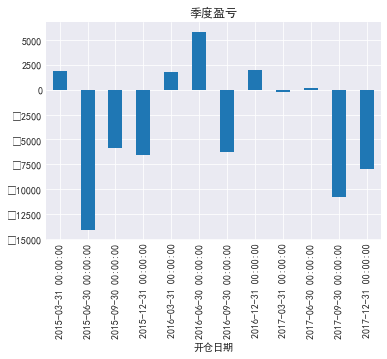

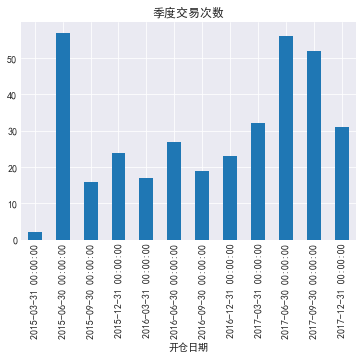

In [30]:
print('-------------------------------------')
def readyto_date(date):
    '''20170211 这种形式不能转成DatatimeIndex     2016/12/28  这种可以'''
    date = str(date)
    year = date[:4]
    month = date[4:6]
    day = date[6:]
    return '/'.join([year, month, day])

df_dateidx = df.copy()
df_dateidx['开仓日期'] = df_dateidx['开仓日期'].apply(readyto_date)
df_dateidx.index = pd.DatetimeIndex(df_dateidx['开仓日期'])
df_dateidx = df_dateidx.drop('开仓日期', axis=1)
#print(df_alldate.index)
#df_alldate.to_csv('df_alldate.csv')
#print( df['逐笔平仓盈亏'].resample('B') )

# 逐月盈亏
zb = df_dateidx['逐笔平仓盈亏']
#yk = zb.resample('M').sum()
#yk.plot(kind='bar')
#plt.show()    

# 逐季度作图
# 逐季度盈亏   

plt.title('季度盈亏')
yk = zb.resample('Q').sum()
yk.plot(kind='bar')
plt.show() 
'''
注意， 现在的资金比初期多, 如果按百分比算的话，应该是比初期要好的
'''
# 逐季度交易次数
kc = df_dateidx['开仓方向']
kcq = kc.resample('Q').count()
plt.title('季度交易次数')
kcq.plot(kind='bar')
plt.show()  

由上图  以季度看下来盈亏和交易次数关系应该不大，交易还是要看时机

### 最近看到一本书<以交易为生>，里面讲到三重过滤，那我以这个思路用日线和周线两个周期是否都顺势来过滤一下自己的交易记录，看看顺势和非顺势有没有明显区别（我这里都不是严格的科学计算，不用什么显著性分析，因为这些区别很明显，用不到那些东西，交易的本质是交易本身，编程和数学只是工具，不能本末倒置，钻牛角尖）

In [31]:
def get_DKX(df, n=10):
    df['a'] = (df.c * 3 + df.l + df.o + df.h)/6
    sum_ = '+'.join(['{}*df.a.shift({})'.format(20-i, i) for i in range(0, 20)]) 
    eval_str = '({})/210'.format(sum_)
    df['b'] = eval(eval_str)
    df['d'] = df.b.rolling(n).mean()
    return df.drop(['a'], axis=1)

In [32]:
# 分品种看   
name = 'rb' # name换一个可看其他品种
dff = df_dateidx[df_dateidx['品种'] == name].copy()   # 对应品种的交易记录

kdata = pd.read_csv(r'..\..\data\{}.csv'.format(name)) # 对应品种的数据
kdata = get_DKX(kdata)
kdata.index = pd.DatetimeIndex(kdata['date'])
kdata['斜率'] = (kdata.b / kdata.d.shift(1))  # 斜率指DKX的斜率
kdata = kdata.dropna(axis=0)
# 开仓当天的斜率

dff['斜率'] = kdata.loc[dff.index,:]['斜率']

dff['斜率上下'] = np.where(dff['斜率']>1, 'up', 'down')
# 斜率向上买， 向下卖是顺势
# 日线顺势
dff['日线顺势'] = np.where( (dff['斜率']>1) & (dff['开仓方向'] == 'buy' ), True, False)
dff['日线顺势'] = np.where( (dff['斜率']<1) & (dff['开仓方向'] == 'sell' ), True, dff['日线顺势'])
#print(dff.head(30))

# 周线顺势
kdata_week = kdata.c.resample('W').ohlc()
kdata_week.columns=list('ohlc')
kdata_week = kdata_week.dropna(axis=0) # 国庆长假啥的没数据，会出NaN
kdata_week = get_DKX(kdata_week).dropna(axis=0)
kdata_week['斜率'] = (kdata_week.b / kdata_week.d.shift(1))  # 斜率指DKX的斜率
kdata_week = kdata_week.dropna(axis=0)
#print(kdata_week)

kdata_week_today = kdata_week.resample('D').ffill() # 把计算出来的周线的数据映射到日线上
#print(kdata_week_today)

dff['周线斜率'] = kdata_week_today.loc[dff.index,:]['斜率']
# 周线顺势
dff['周线顺势'] = np.where( (dff['周线斜率']>1) & (dff['开仓方向'] == 'buy' ), True, False)
dff['周线顺势'] = np.where( (dff['周线斜率']<1) & (dff['开仓方向'] == 'sell' ), True, dff['周线顺势'])


dff['日周都顺势'] = np.where( (dff['周线顺势']==True) & (dff['日线顺势']==True), True, False)

#print(dff[['日线顺势','周线顺势','日周都顺势']] )

# 光日线顺势
#syk = dff.groupby('日线顺势').sum()['逐笔平仓盈亏']  #  顺势和逆势的盈亏
#ccs = dff['日线顺势'].value_counts()           #  顺势和逆势交易次数
# 光周线顺势
#syk = dff.groupby('周线顺势').sum()['逐笔平仓盈亏']  #  顺势和逆势的盈亏
#ccs = dff['周线顺势'].value_counts()           #  顺势和逆势交易次数
# 日周都顺势
syk = dff.groupby('日周都顺势').sum()['逐笔平仓盈亏']  #  顺势和逆势的盈亏
ccs = dff['日周都顺势'].value_counts()           #  顺势和逆势交易次数

#print(syk)
#print(ccs)  #
print('--------------------顺势平均单次盈亏------------')
print(syk[True]/ccs[True])  
print('--------------------逆势平均单次盈亏------------')   
print(syk[False]/ccs[False]) 

--------------------顺势平均单次盈亏------------
49.7058823529
--------------------逆势平均单次盈亏------------
-148.666666667


### 可看到，区别很明显，所以三重过滤是真有用，或许会错过点机会，但更多的是可以过滤掉很多不必要的操作。（突然想到克罗的三均线其实也不是三重过滤吗？）用成功人士的方法，再加上用自己的真是记录验证了一下，更有信心了。我现在不缺心态和资金管理，最缺的是合理的方法！
### 以后在合适的品种里选大中周期都顺势的做，小周期可以逆势，浮盈顺势加仓，我的大中小周期分别是周线日线小时线。判断顺势的指标不是最重要。我用DKX，我发现用其他的也差不多。